### SVM Kernels Indepth Intuition And Practical Explanation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [2]:
y

array([ 8.66025404,  8.71779204,  8.77378994,  8.82827705,  8.88128118,
        8.93282873,  8.98294476,  9.03165312,  9.07897646,  9.12493632,
        9.16955321,  9.21284664,  9.25483518,  9.29553652,  9.3349675 ,
        9.37314414,  9.41008171,  9.44579475,  9.4802971 ,  9.51360192,
        9.54572176,  9.57666854,  9.60645359,  9.63508769,  9.66258107,
        9.68894344,  9.714184  ,  9.73831149,  9.76133416,  9.7832598 ,
        9.80409577,  9.82384901,  9.84252604,  9.86013297,  9.87667553,
        9.89215905,  9.90658851,  9.91996849,  9.93230325,  9.94359667,
        9.9538523 ,  9.96307334,  9.97126266,  9.9784228 ,  9.98455598,
        9.98966408,  9.99374868,  9.99681104,  9.99885209,  9.99987246,
        9.99987246,  9.99885209,  9.99681104,  9.99374868,  9.98966408,
        9.98455598,  9.9784228 ,  9.97126266,  9.96307334,  9.9538523 ,
        9.94359667,  9.93230325,  9.91996849,  9.90658851,  9.89215905,
        9.87667553,  9.86013297,  9.84252604,  9.82384901,  9.80

In [3]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

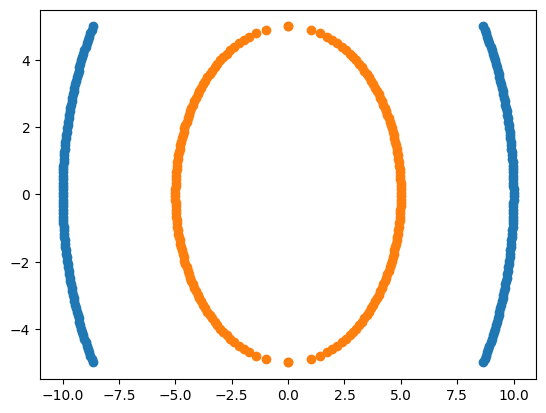

In [4]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [5]:
np.vstack([y,x]).T

array([[ 8.66025404, -5.        ],
       [ 8.71779204, -4.8989899 ],
       [ 8.77378994, -4.7979798 ],
       [ 8.82827705, -4.6969697 ],
       [ 8.88128118, -4.5959596 ],
       [ 8.93282873, -4.49494949],
       [ 8.98294476, -4.39393939],
       [ 9.03165312, -4.29292929],
       [ 9.07897646, -4.19191919],
       [ 9.12493632, -4.09090909],
       [ 9.16955321, -3.98989899],
       [ 9.21284664, -3.88888889],
       [ 9.25483518, -3.78787879],
       [ 9.29553652, -3.68686869],
       [ 9.3349675 , -3.58585859],
       [ 9.37314414, -3.48484848],
       [ 9.41008171, -3.38383838],
       [ 9.44579475, -3.28282828],
       [ 9.4802971 , -3.18181818],
       [ 9.51360192, -3.08080808],
       [ 9.54572176, -2.97979798],
       [ 9.57666854, -2.87878788],
       [ 9.60645359, -2.77777778],
       [ 9.63508769, -2.67676768],
       [ 9.66258107, -2.57575758],
       [ 9.68894344, -2.47474747],
       [ 9.714184  , -2.37373737],
       [ 9.73831149, -2.27272727],
       [ 9.76133416,

In [6]:
import pandas as pd
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = df1+df2
df.head(5)

,X1,X2,Y
0,8.660254,-10.000000,1
1,9.717741,-9.797980,1
2,10.180698,-9.595960,1
3,10.542475,-9.393939,1
4,10.850331,-9.191919,1


In [7]:
df.tail()

,X1,X2,Y
195,-10.850331,-9.191919,1
196,-10.542475,-9.393939,1
197,-10.180698,-9.595960,1
198,-9.717741,-9.797980,1
199,-8.660254,-10.000000,1


In [8]:
### Independent and Dependent features
X = df.iloc[:, :2]  
y = df.Y

In [9]:
y

0      1
1      1
2      1
3      1
4      1
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 200, dtype: int64

In [10]:
## Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [11]:
y_train

71     1
124    1
184    1
97     1
149    1
      ..
67     1
192    1
117    1
47     1
172    1
Name: Y, Length: 150, dtype: int64

### Polynomial Kernel
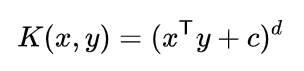

In [12]:
# We need to find components for the Polynomical Kernel
#X1,X2,X1_square,X2_square,X1*X2
df['X1_Square']= df['X1']**2
df['X2_Square']= df['X2']**2
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-10.000000,1,75.000000,100.000000,-86.602540
1,9.717741,-9.797980,1,94.434491,96.000408,-95.214230
2,10.180698,-9.595960,1,103.646609,92.082441,-97.693565
3,10.542475,-9.393939,1,111.143786,88.246097,-99.035374
4,10.850331,-9.191919,1,117.729673,84.491378,-99.735362


In [13]:
### Independent and Dependent features
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [14]:
y

0      1
1      1
2      1
3      1
4      1
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 200, dtype: int64

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)


In [16]:
X_train

,X1,X2,X1_Square,X2_Square,X1*X2
71,14.265071,4.343434,203.492247,18.865422,61.959399
124,-13.948077,5.151515,194.548844,26.538108,-71.853729
184,-12.958647,-6.969697,167.926533,48.576676,90.317843
97,10.180698,9.595960,103.646609,92.082441,97.693565
149,-14.999617,0.101010,224.988522,0.010203,-1.515113
...,...,...,...,...,...
67,14.519632,3.535354,210.819709,12.498725,51.332032
192,-11.595002,-8.585859,134.444074,73.716968,99.553048
117,-13.217139,6.565657,174.692767,43.107846,-86.779196
47,14.990430,-0.505051,224.712994,0.255076,-7.570924


In [17]:
import plotly.express as px
fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2',color='Y')
fig.show()


In [18]:

fig = px.scatter_3d(df, x='X1_Square', y='X1_Square', z='X1*X2',
              color='Y')
fig.show()

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

ValueError: The number of classes has to be greater than one; got 1 class

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="poly")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="rbf")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="sigmoid")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0